# Assignment 3

## Importing Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import gif
from IPython.display import Image

-------------------------------------------------------------------------------------------------------------------------------

## Maximum Likelihood Estimator & Dataset

In [18]:
# dataset of size = 160
size = 160
# randomly generaing max likelihood estimator
uml = np.random.rand()
# to ensure max likelihood estimator does not fall in the range [0.4, 0.6]
while uml >= 0.4 and uml <= 0.6:
    uml = np.random.rand()
# randomly generating a dataset of 160 coin tosses
data = np.random.choice([0, 1], size=size, p=[1 - uml, uml])
unique, counts = np.unique(data, return_counts = True)
uml = counts[1] / 160

The dataset consists of 160 entries - each outcome representing a coin toss. The mean as well as the actual outcomes have been generated randomly using numpy library functions. The Prior Mean may change each time the notebook is run and the same is printed as the output of the following cell.

In [19]:
print(f"µml = {uml}")

µml = 0.375


-------------------------------------------------------------------------------------------------------------------------------

## Prior Distribution

$$p(𝜇| 𝑎, 𝑏) = 𝐵𝑒𝑡𝑎(𝜇| 𝑎, 𝑏) = \frac{𝛤(𝑎 + 𝑏)}{{𝛤(𝑎)}{𝛤(𝑏)}}  𝜇 ^{𝑎−1}  (1 − 𝜇) ^{𝑏−1}$$

$$E[µ] = \frac{a}{a + b} $$

$$var[µ] = \frac {ab}{(a + b)^2(a + b + 1)}$$

__Plotting Prior Distribution__

Since the Prior Probability follows a Beta Distribution and has a mean value of 0.4, the hyperparameter values a = 2 and b = 3 would yield the requisite mean value.

Given, $E[µ] = 0.4$. Therefore, $a = \frac{2}{3} b$. The values of $a$ and $b$ are taken as $2$ and $3$ respectively.

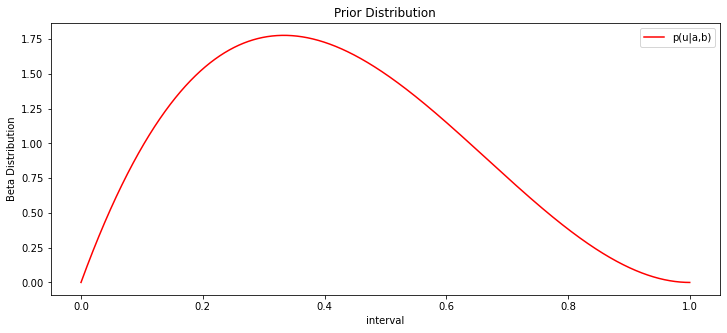

In [30]:
# Assumed hyperparameters of Beta Distribution
a , b = 2, 3
# interval between 0 & 1
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel("Beta Distribution")
ax.set_xlabel("interval")
ax.set_title("Prior Distribution")
ax.plot(x, beta.pdf(x, a, b), color = "red", label="p(u|a,b)")
ax.legend();

-------------------------------------------------------------------------------------------------------------------------------

## Posterior Distribution

$$p(µ|m, l, a, b) ∝ µ^{m+a−1}(1 − µ)^{l+b−1}$$

$$p(µ|m, l, a, b) = \frac{Γ(m + a + l + b)}{Γ(m + a)Γ(l + b)} µ^{m+a−1}(1 − µ)^{l+b−1}$$

$$E[µ] = \frac{a + m}{a + m + b + l} $$

where $m$ = number of heads in the dataset. $l$ = number of tails in the dataset = size of dataset - $m$ = 160 - $m$.

__Using Whole Dataset__

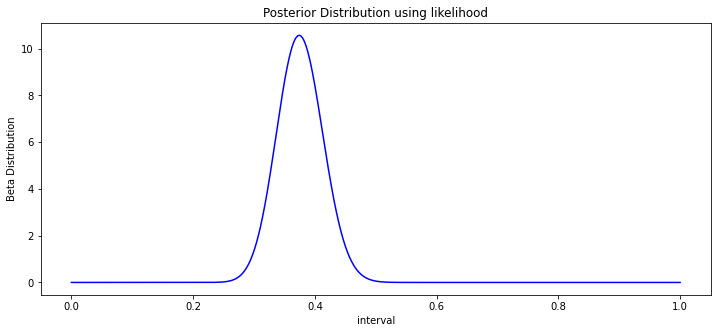

In [29]:
# Hyperparameters of the prior
a , b = 2, 3
# information from the dataset
m, l = counts[1], counts[0]
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Posterior Distribution using likelihood")
ax.set_xlabel("interval")
ax.set_ylabel("Beta Distribution")
ax.plot(x, beta.pdf(x, a + m, b + l), color = "blue");

__Sequential Approach__

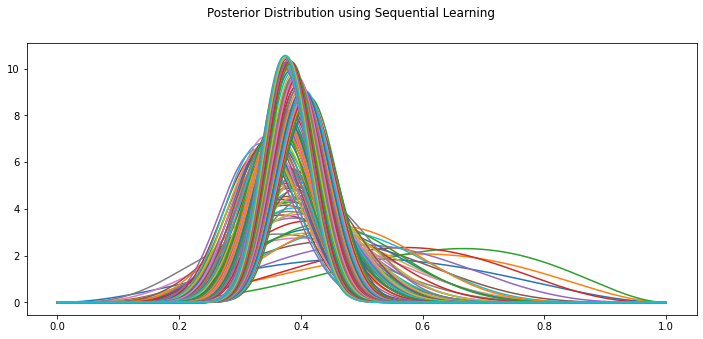

In [28]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Posterior Distribution using Sequential Learning')
ax = fig.add_subplot(1, 1, 1)
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    ax.plot(x, beta.pdf(x, a+m, b+l));

__Converting Sequential Plots into GIF: Evolution of Posterior__

In [23]:
a, b = 2, 3
m, l = 0, 0
x = np.linspace(0, 1, 10000)
@gif.frame
def plot(a, b, m, l):
    y = beta.pdf(x, a + m, b + l)
    plt.plot(x, y)
    plt.xlim((0, 1))

In [24]:
frames = []
for i in data:
    if i == 1:
        m += 1
    else:
        l += 1
    frame = plot(a, b, m, l)
    frames.append(frame)

In [25]:
gif.save(frames, 'sequential_training.gif', duration=100, unit="ms", loop=True, between="frames")

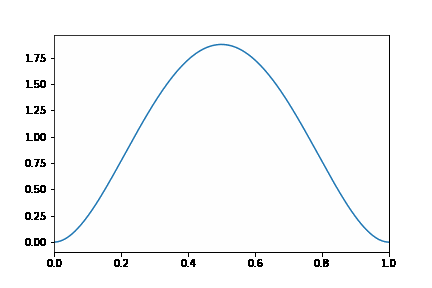

In [26]:
gif = "sequential_training.gif"
Image(open(gif, 'rb').read())

-------------------------------------------------------------------------------------------------------------------------------

## Final Analysis

${Posterior} {Mean} {Value} = \frac{a+m}{{a+m}+{b+l}}$

In [13]:
print(f"Posterior Mean Value obtained is {(a + m)/(a+m+b+l)}")

Posterior Mean Value obtained is 0.7515151515151515


__Similarities and Differences between sequential approach and likelihood approach__

1. The sequential approach incorporates a Bayesian viewpoint. It is independent of the
   choice of the prior and the likelihood function. It records observations one at a time
   and discards them before the next observation is recorded.

2. Therefore, the sequential method comes in handy for large datasets for its ability to work with partial data as opposed to  the whole dataset. On observing the plot, the beta distribution curve becomes increasingly sharp-peaked with an increase in    the number of observations.

3. When the whole dataset is available at once, the number of ones and zeros in the
   dataset respectively updates the parameter values simultaneously.

4. The posterior mean always lies between the prior mean and the likelihood mean.

5. Both the approaches yield the same final posterior distribution.

-------------------------------------------------------------------------------------------------------------------------------